# Анализ бизнес показателей развлекательного приложения Procrastinate Pro+

# Описание проекта 

Мне, маркетинговому аналитику развлекательного приложения Procrastinate Pro+, поступило следующее задание. Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. Моя задача — разобраться в причинах и помочь компании выйти в плюс. Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:

- лог сервера с данными об их посещениях,
- выгрузка их покупок за этот период,
- рекламные расходы.

# План выполнение проекта

**Шаг 1.** Загрузить данные и подготовьть их к анализу.

Загрузить данные о визитах, заказах и рекламных расходах из CSV-файлов в переменные.

**Пути к файлам**

- визиты: `/datasets/visits_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/visits_info_short.csv);
- заказы: `/datasets/orders_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/orders_info_short.csv);
- расходы: `/datasets/costs_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/costs_info_short.csv).

1. Изучить данные и выполнить предобработку. 
2. Проверить данные на пропуски и дубликаты.
3. Убедиться, что типы данных во всех колонках соответствуют сохранённым в них значениям. 
4. Проверить информацию столбцов с датой и временем.

**Шаг 2.** Написать функции для расчёта и анализа LTV, ROI, удержания и конверсии и визуализации полученных данных.


Для вычисления значений необходимых метрик понадобятся следующие функции:

- **get_profiles()** — для создания профилей пользователей,
- **get_retention()** — для подсчёта Retention Rate,
- **get_conversion()** — для подсчёта конверсии,
- **get_ltv()** — для подсчёта LTV.

Для визуализации полученных данных необходимо написать следующие функции:

- **filter_data()** — для сглаживания данных,
- **plot_retention()** — для построения графика Retention Rate,
- **plot_conversion()** — для построения графика конверсии,
- **plot_ltv_roi** — для визуализации LTV и ROI.

**Шаг 3.** Провести исследовательский анализ данных.

1. Составить профили пользователей. Определить минимальную и максимальную даты привлечения пользователей.
2. Выяснить, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Построить таблицу, отражающую количество пользователей и долю платящих из каждой страны.
3. Узнать, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Построить таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
4. Изучить рекламные источники привлечения и определить каналы, из которых пришло больше всего платящих пользователей. Построить таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

**Шаг 4.** Маркетинг.

1. Посчитать общую сумму расходов на маркетинг.
2. Выяснить, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
3. Построить график с визуализацией динамики изменения расходов во времени по неделям по каждому источнику. Затем на другом графике визуализировать динамику изменения расходов во времени по месяцам по каждому источнику.
4. Узнать, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника, используя профили пользователей.

**Шаг 5.** Оценить окупаемость проведенной рекламной компании.

Используя графики LTV, ROI и CAC, проанализировать окупаемость рекламы. Исседование проводится 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей необходимо определить самостоятельно.

1. Проанализировать окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
2. Проверить конверсию пользователей и динамику её изменения. То же самое сделать с удержанием пользователей. Построить и изучить графики конверсии и удержания.
3. Проанализировать окупаемость рекламы с разбивкой по устройствам. Построить графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
4. Проанализировать окупаемость рекламы с разбивкой по странам. Построить графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
5. Проанализировать окупаемость рекламы с разбивкой по рекламным каналам. Построить графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
6. Ответить на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

**Шаг 6.** Сформулировать вывод по проведенному исследованию.

1. Выделить причины неэффективности привлечения пользователей.
2. Сформулировать рекомендации для отдела маркетинга.

### Загрузка данных и подготовка к анализу

In [66]:
# импортируем необходимые библиотеки

import pandas as pd
import numpy as np
from datetime import date, datetime, timedelta
from dateutil.relativedelta import relativedelta
from matplotlib import pyplot as plt
import seaborn as sns
import math
import warnings
warnings.filterwarnings('ignore')

In [67]:
# загрузим из csv-файлов и сохраним датафреймы в переменные

try:
    visits = pd.read_csv('/datasets/visits_info_short.csv')
    orders = pd.read_csv('/datasets/orders_info_short.csv')
    costs = pd.read_csv('/datasets/costs_info_short.csv')
except:
    visits = pd.read_csv('https://code.s3.yandex.net/datasets/visits_info_short.csv')
    orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders_info_short.csv')
    costs = pd.read_csv('https://code.s3.yandex.net/datasets/costs_info_short.csv')

In [68]:
# выведем данные переменных на экран

visits.head()

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


In [69]:
orders.head()

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


In [70]:
costs.head()

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


In [71]:
# при наименовании столбцов используются разные регистры, необходимо привести к нижнему регистру

visits.columns = visits.columns.str.lower()
orders.columns = orders.columns.str.lower()
costs.columns = costs.columns.str.lower()

In [72]:
# поменяем пробелы в названиях столбцов на нижнее подчеркивание "_"

visits.columns = visits.columns.str.replace(' ', '_')
orders.columns = orders.columns.str.replace(' ', '_')

In [73]:
# выведем основую информацию о датафреймах

visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   user_id        309901 non-null  int64 
 1   region         309901 non-null  object
 2   device         309901 non-null  object
 3   channel        309901 non-null  object
 4   session_start  309901 non-null  object
 5   session_end    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


In [74]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   40212 non-null  int64  
 1   event_dt  40212 non-null  object 
 2   revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


In [75]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


In [76]:
# проверяем датафреймы на дубликаты

print('\033[1m' + 'Количество дубликатов в таблице:' + '\033[0m', visits.duplicated().sum())

Количество дубликатов в таблице: 0


In [77]:
print('\033[1m' + 'Количество дубликатов в таблице:' + '\033[0m', orders.duplicated().sum())

Количество дубликатов в таблице: 0


In [78]:
print('\033[1m' + 'Количество дубликатов в таблице:' + '\033[0m', costs.duplicated().sum())

Количество дубликатов в таблице: 0


In [79]:
# проведем проверку категриальных значений на неяные дубликаты
print('\033[1m' + 'Уникальные значения столбца "region":' + '\033[0m', sorted(visits['region'].unique().tolist()))

Уникальные значения столбца "region": ['France', 'Germany', 'UK', 'United States']


In [80]:
print('\033[1m' + 'Уникальные значения столбца "device":' + '\033[0m', sorted(visits['device'].unique().tolist()))

Уникальные значения столбца "device": ['Android', 'Mac', 'PC', 'iPhone']


In [81]:
print('\033[1m' + 'Уникальные значения столбца "channel":' + '\033[0m', sorted(visits['channel'].unique().tolist()))

Уникальные значения столбца "channel": ['AdNonSense', 'FaceBoom', 'LeapBob', 'MediaTornado', 'OppleCreativeMedia', 'RocketSuperAds', 'TipTop', 'WahooNetBanner', 'YRabbit', 'lambdaMediaAds', 'organic']


In [82]:
# переведем столбцы к фармату datetime

visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt'])

**Общий вывод:**

- импортировал необходимые для работы библиотеки;

- записал данные в 3 датафрейма;

- изменил для удобства названия столбцов втаблицах;

- проверка, показала отсутсвие пропусков, дубликатов и неявных дубликатов в датафреймах;

- провел замену типов данных на datetime в столбцах с датами.

### Создание функций для расчёта и анализа LTV, ROI, удержания и конверсии и визуализации полученных данных.

#### Функции для расчета и анализа LTV, ROI, удержания и конверсии

In [93]:
# функция создания профилей ползователей

def get_profiles(sessions, orders, ad_costs, event_names=[]):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['dt'] = pd.to_datetime(profiles['dt'], format = '%Y-%m-%d')
    profiles['month'] = profiles['first_ts']#.astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())


    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

In [94]:
# функция расчета удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [95]:
# функция расчета конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [96]:
# функция расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

#### Функции для визуализации полученных данных

In [97]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

In [98]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

In [99]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

In [100]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

In [101]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

**Общий вывод создания функций для анализа показателей и визуализации:**

- **задал основные функции:**

  — для создания профилей пользователей;
  
  — для подсчёта Retention Rate;
  
  — для подсчёта конверсии;
  
  — для подсчёта LTV.

 
 - **задал функции для построения графиков:**

   — для сглаживания данных;
   
   — для построения графика Retention Rate;
   
   — для построения графика конверсии;
   
   — для визуализации LTV и ROI.

### Проведение исследовательского анализа данных

#### Составим профили пользователей

In [102]:
profiles = get_profiles(visits, orders, costs)
profiles.head()

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-07 20:58:57,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-09 12:46:07,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01 09:58:33,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-22 21:35:48,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-02 00:07:44,False,0.230769


In [103]:
#находим минимальную дату привлечения пользователей:

print(profiles['first_ts'].min())

2019-05-01 00:00:41


In [104]:
#находим максимальную дату привлечения пользователей:

print(profiles['first_ts'].max())

2019-10-27 23:59:04


**Вывод**

- минимальная дата привлечения 1 мая 2019 г;
- максимальная дата привлечения 27 октября 2019 г.

Полученные в ходе исследования данные соответствуют указанным в ТЗ.

#### Выясним, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей.

In [105]:
region_buy = profiles.groupby('region').agg({'user_id': 'nunique', 'payer': 'sum'}).sort_values(by = 'user_id', ascending = False)
region_buy['payer_per'] = region_buy['payer'] / region_buy['user_id'] * 100
region_buy.drop('payer', axis = 1)

,user_id,payer_per
region,,
United States,100002,6.901862
UK,17575,3.982930
France,17450,3.799427
Germany,14981,4.111875


**Вывод**

- подавляющее число пользователей из **United States** 100 тыс, из них 6,9% платящих;
- второе место у **UK** - это 17,5 тыс пользователей, из них 4% платящих;
- третье место у **France** - это 17,4 тыс пользователей, из них 3,8% платящих.

#### Узнаем, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи.

In [106]:
device_buy = profiles.groupby('device').agg({'user_id': 'nunique', 'payer': 'sum'}).sort_values(by = 'user_id', ascending = False)
device_buy['payer_per'] = device_buy['payer'] / device_buy['user_id'] * 100
device_buy.drop('payer', axis = 1)

,user_id,payer_per
device,,
iPhone,54479,6.207897
Android,35032,5.851793
PC,30455,5.046790
Mac,30042,6.364423


**Вывод:**

- Больше всего пользователей, используют iPhone, из них 6,2% платящих;
- На втором месте пользователи Android - 35 тыс. пользователей, из них 5,85% платящих.

####  Определим рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей.

In [107]:
channel_buy = profiles.groupby('channel').agg({'user_id': 'nunique', 'payer': 'sum'})
channel_buy['payer_per'] = channel_buy['payer'] / channel_buy['user_id'] * 100
channel_buy.sort_values(by = 'payer', ascending = False)

,user_id,payer,payer_per
channel,,,
FaceBoom,29144,3557,12.204914
TipTop,19561,1878,9.600736
organic,56439,1160,2.055316
WahooNetBanner,8553,453,5.296387
AdNonSense,3880,440,11.340206
RocketSuperAds,4448,352,7.913669
LeapBob,8553,262,3.063253
OppleCreativeMedia,8605,233,2.707728
lambdaMediaAds,2149,225,10.469986


**Вывод**

Анализ данных выявил топ-3 рекламных источников:

- **FaceBoom**, 3,5 тыс платящих пользователей из 29 тыс привлеченных;
- **TipTop** - 1,8 тыс платящих пользователей из 19,5 тыс привлеченных;
- **organic** - 1,1 тыс платящих пользователей из 56 тыс привлеченных.

### Маркетинг

#### Вычислим общую сумму расходов на маркетинг.

In [108]:
costs['costs'].sum()

105497.30000000002

**Вывод:**

Бюджет компании на маркетинг составил 105 497 у.е.

#### Расчитаем распределение бюджета компании на маркетинг по рекламным источникас, то есть определим сколько денег потратили на каждый источник

In [109]:
costs.groupby('channel').agg({'costs':'sum'}).sort_values(by='costs', ascending = False)

,costs
channel,
TipTop,54751.30
FaceBoom,32445.60
WahooNetBanner,5151.00
AdNonSense,3911.25
OppleCreativeMedia,2151.25
RocketSuperAds,1833.00
LeapBob,1797.60
lambdaMediaAds,1557.60
MediaTornado,954.48


**Вывод:**

Расчеты показывают, что два канала - **TipTop** и **FaceBoom**, аккомулируют большую часть денежных средств. Их значения в разы больше, чем у остальных источников. Можно сделать вывод, что это 2 основных рекламных источника, откуда приходят пользователи.

#### Визуализируем динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику.

In [110]:
# добавим столбцы с номером недели и месяца

costs['week'] = costs['dt'].dt.isocalendar().week
costs['month'] = costs['dt'].dt.month

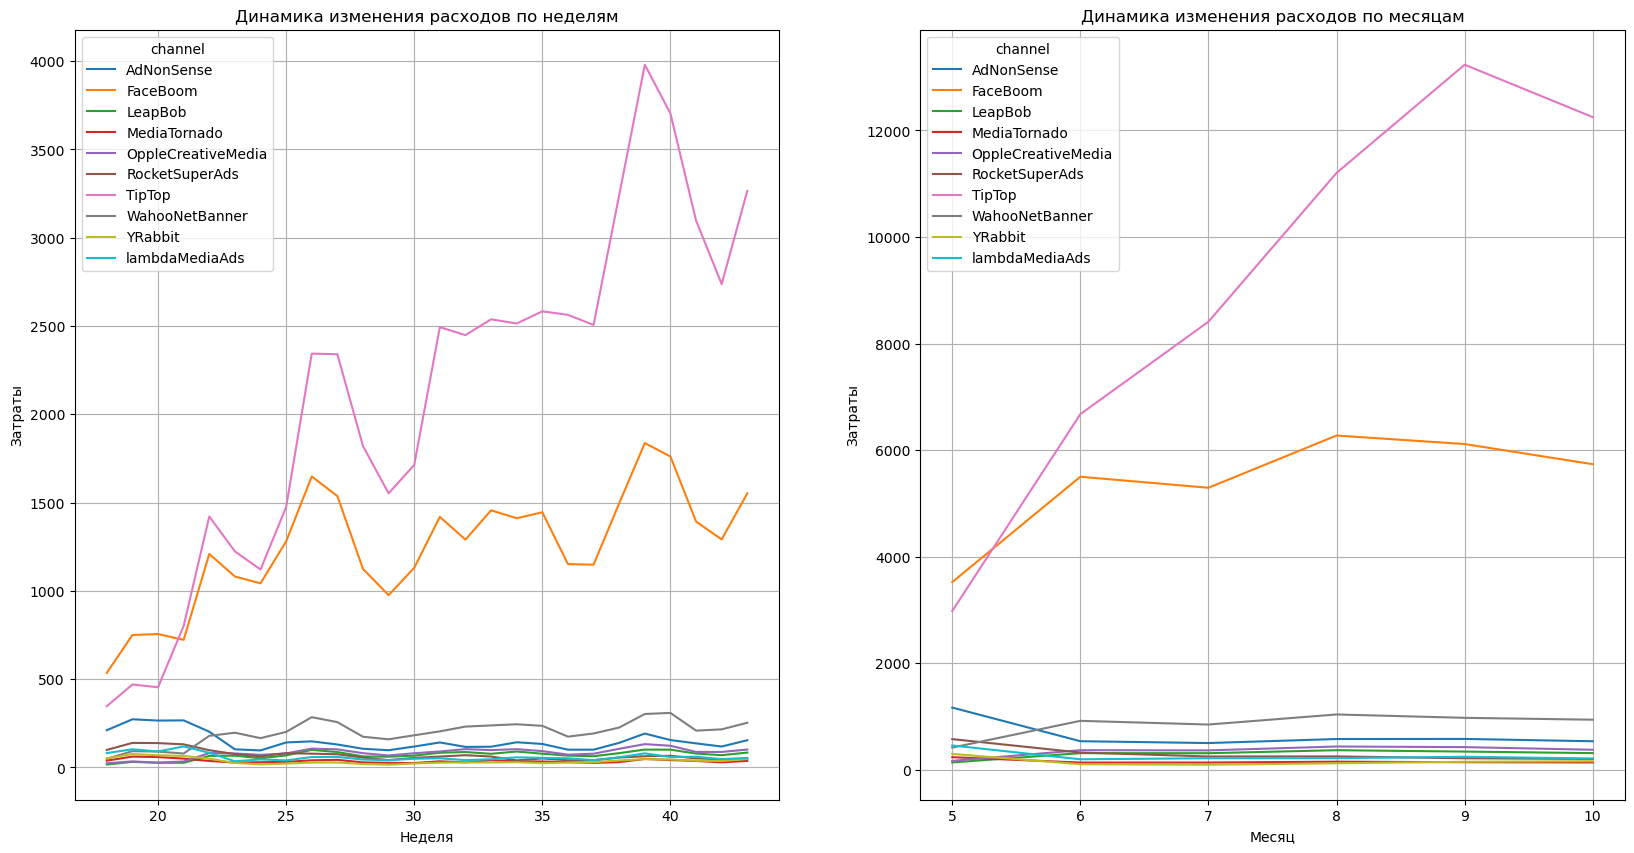

In [111]:
# строим графики

plt.figure(figsize=(20, 10))
costs.pivot_table(index = 'week', columns = 'channel', values = 'costs', aggfunc = 'sum').plot(grid = True, ax = plt.subplot(1, 2, 1))
plt.xlabel('Неделя')
plt.ylabel('Затраты')
plt.title('Динамика изменения расходов по неделям')

costs.pivot_table(index = 'month', columns = 'channel', values = 'costs', aggfunc = 'sum').plot(grid = True, ax = plt.subplot(1, 2, 2))
plt.xlabel('Месяц')
plt.ylabel('Затраты')
plt.title('Динамика изменения расходов по месяцам')
plt.show()

**Вывод**

1. Аналогично, здесь также выбиваются **TipTop**, **FaceBoom**. Ничего странного, много пользователей - много затрат.
2. Графики показывают, что расходы на по источнику **TipTop** начинают расти в 21 недели и достигают максимума на 38 неделю, что подтверждает и график по месяцам.
3. Источник **FaceBoom** также демонстрирует рост с 21 недели, и выходит на максимальные показатели к 38 неделе рекламной комании.

####  Расчитаем среднюю стоимость привлечение одного пользователя (CAC) из каждого источника.

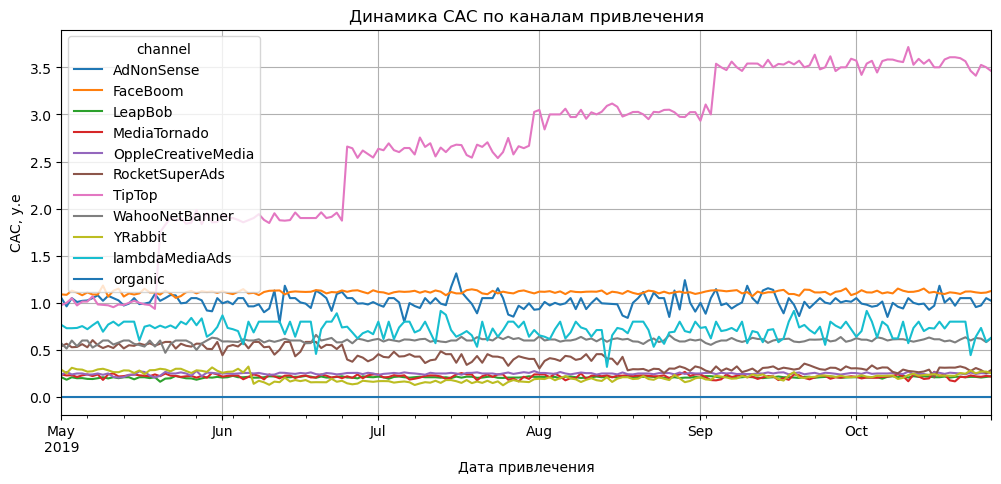

In [113]:
profiles.pivot_table(
    index='dt', columns='channel', values='acquisition_cost', aggfunc='mean'
).plot(grid=True, figsize=(12, 5))
plt.ylabel('CAC, у.е')
plt.xlabel('Дата привлечения')
plt.title('Динамика САС по каналам привлечения')
plt.show()

In [114]:
cac_by_channel = pd.DataFrame()

# уберём органических пользователей

profiles = profiles.query('channel != "organic"')
cac_by_channel['acquisition_cost_mean'] = profiles.groupby('channel')['acquisition_cost'].mean()
cac_by_channel.sort_values(by='acquisition_cost_mean', ascending=False).style.format({'acquisition_cost_mean': '{:.2f}'})

,acquisition_cost_mean
channel,
TipTop,2.80
FaceBoom,1.11
AdNonSense,1.01
lambdaMediaAds,0.72
WahooNetBanner,0.60
RocketSuperAds,0.41
OppleCreativeMedia,0.25
YRabbit,0.22
MediaTornado,0.22


**Вывод**

1. Исследование показало интересные значения динамики CAC по каналу **TipTop** - стоимость привлечения одного пользователя выросла в 3,5 раза за 5 месяцев
2. Самыми дорогими в среднем за все время оказались каналы:
  - **TipTop** - 2.8 у.е.; 
  - **FaceBoom** - 1.11 у.е.; 
  - **AdNonSense** - 1.01 у.е.



### Оценим окупаемость рекламы

#### Проанализируем окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.

In [115]:
# зададим момент и горизонт анализа, согласно ТЗ

observation_date = datetime(2019, 11, 1).date()  # момент анализа
horizon_days = 14  # горизонт анализа 

# исключим канал organic, так как стоимость их привлечения 0

profiles = profiles.query('channel != "organic"')

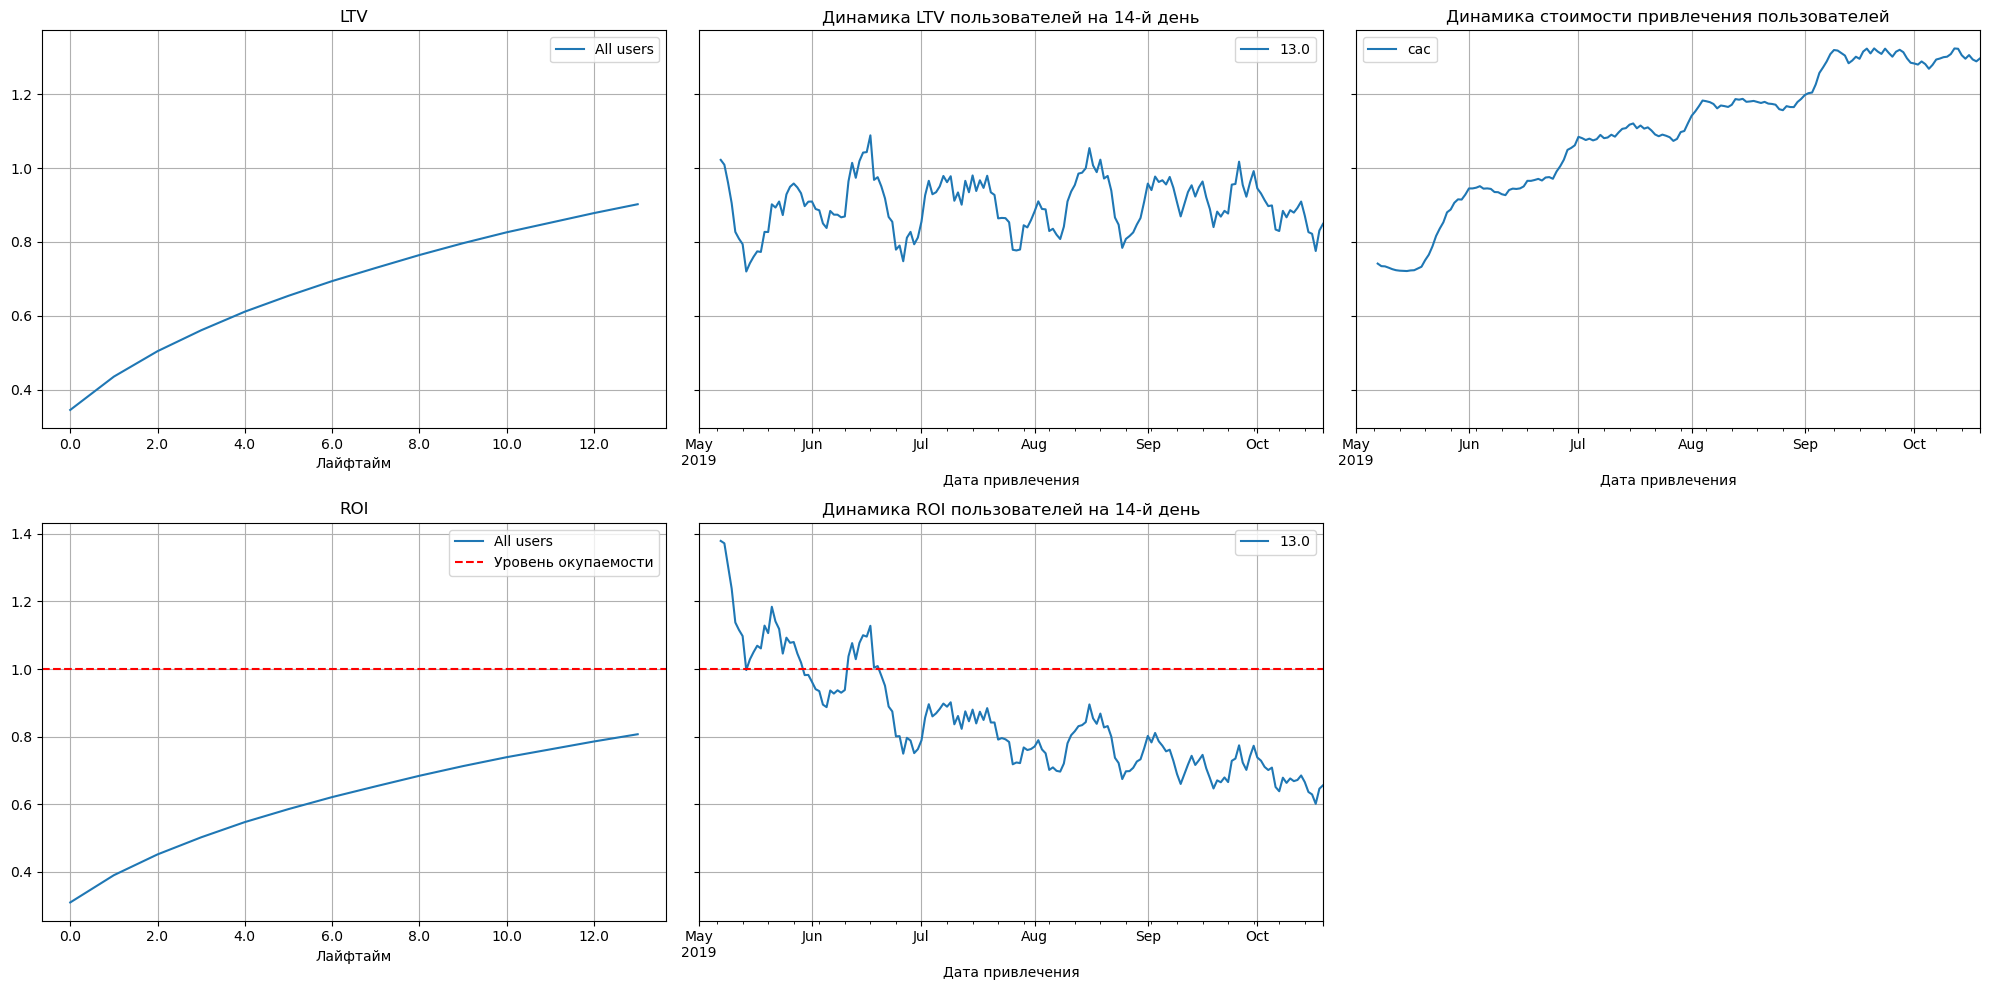

In [116]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

**Построенные графики показывают следующее:**

- На графике явно видим, что реклама не окупается (ROI ниже единицы).

- LTV в компаниях, как правило, постоянно растет. Если бы мы увидели падение, это бы означало, скорее всего, наличие ошибки в 
  расчетах. Но на графике LTV стабилен.

- Стоимость привлечения пользователей (CAC) со временем увеличивалась; она окупалась только в мае-июне. CAC может быть какой 
  угодно в зависимости, например, от того, какая цена рекламы была установлена.

#### Проверим конверсию пользователей, динамику её изменения, удержание пользователей и динамику ее изменения.

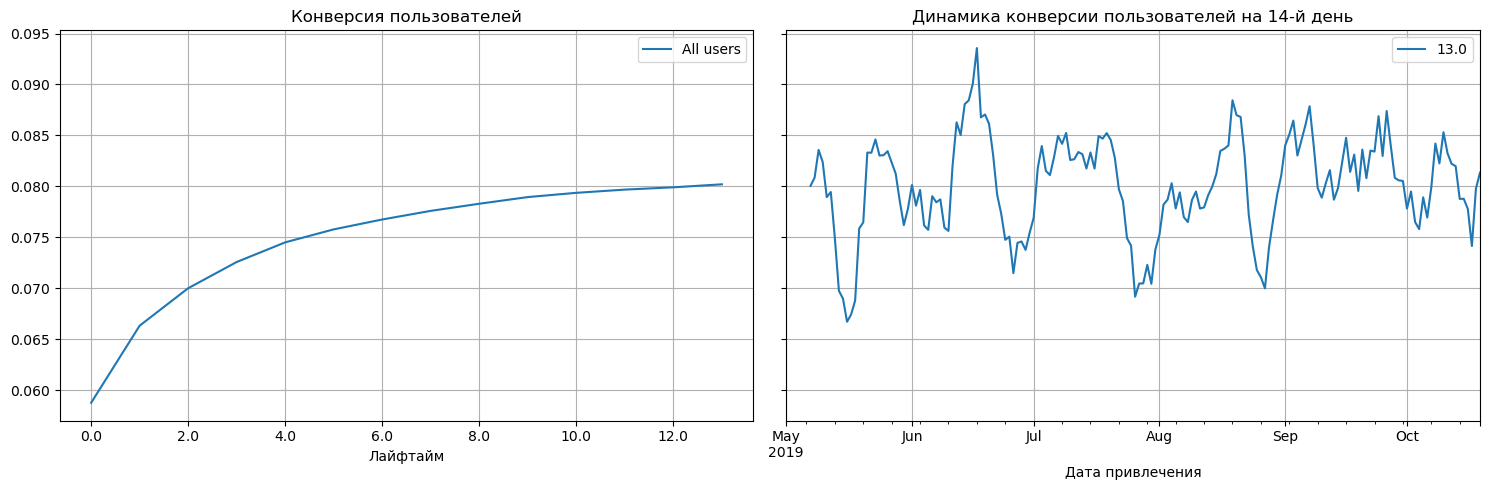

In [117]:
# построим графики конверсии и динамики конверсии
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

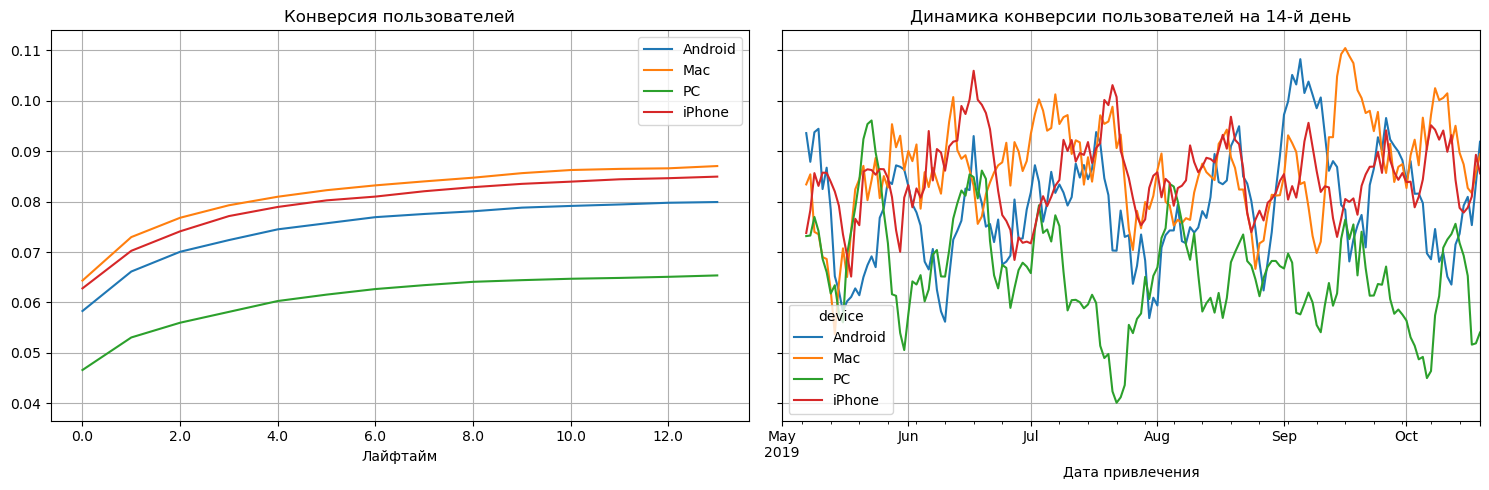

In [118]:
# смотрим конверсию с разбивкой по устройствам
dimensions = ['device']

conversion_raw, conversion_grouped, conversion_history = get_conversion(profiles, orders, observation_date, \
                                                                        horizon_days, dimensions=dimensions)

plot_conversion(conversion_grouped, conversion_history, horizon_days)


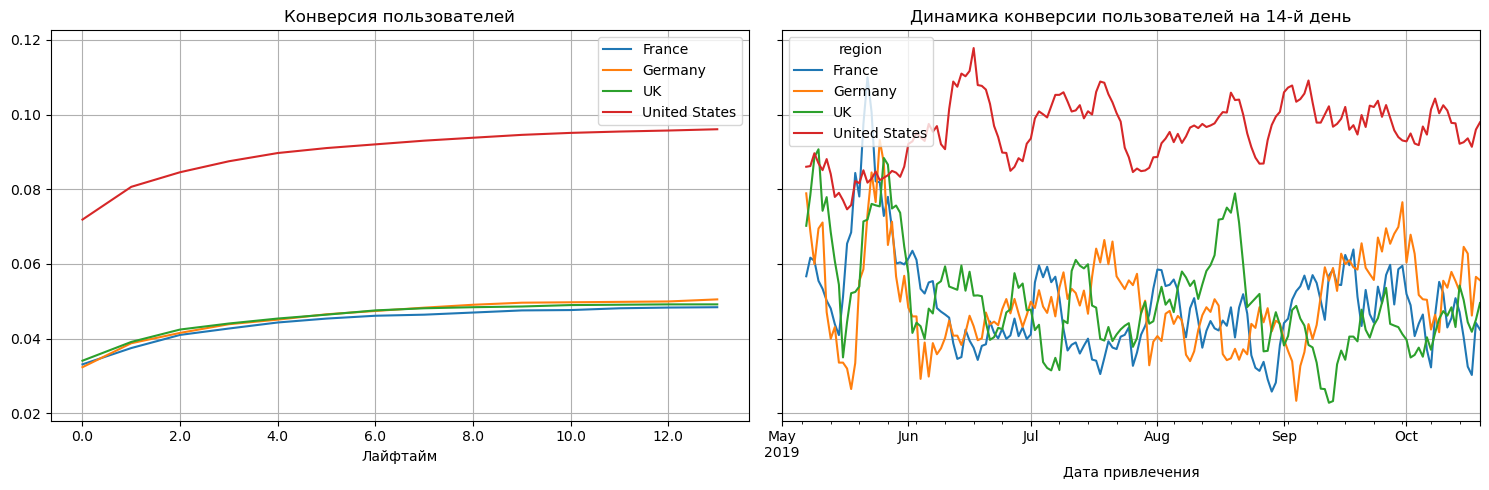

In [119]:
# смотрим конверсию с разбивкой по странам

dimensions = ['region']

conversion_raw, conversion_grouped, conversion_history = get_conversion(profiles, orders, observation_date, \
                                                                        horizon_days, dimensions=dimensions)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

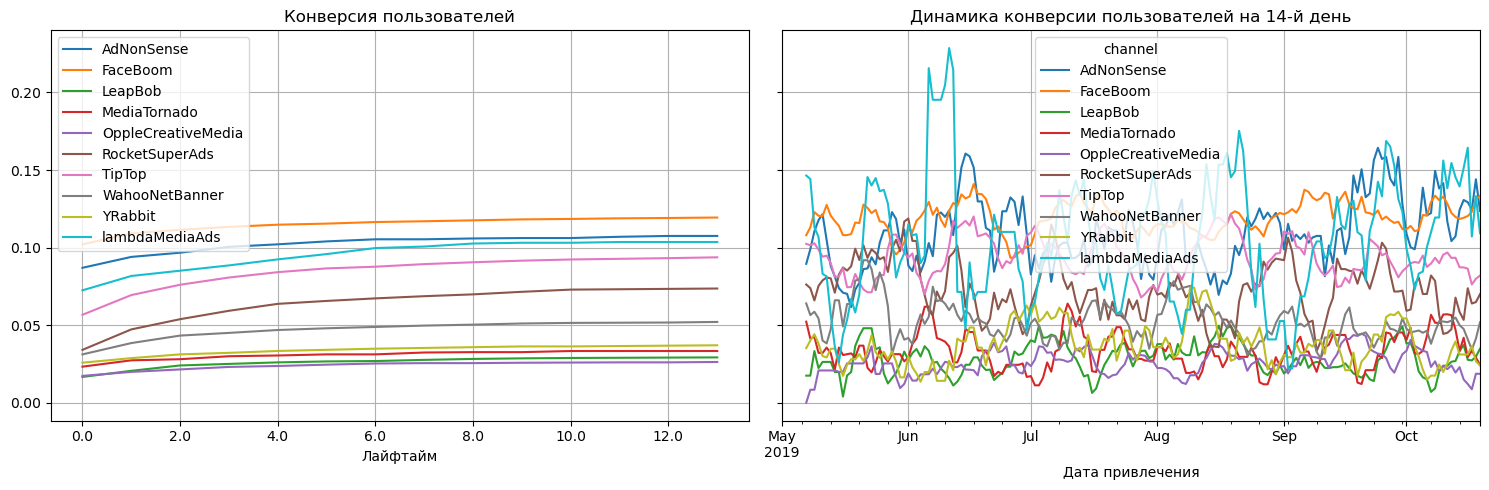

In [120]:
# смотрим конверсию с разбивкой по рекламным каналам

dimensions = ['channel']

conversion_raw, conversion_grouped, conversion_history = get_conversion(profiles, orders, observation_date, \
                                                                        horizon_days, dimensions=dimensions)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

**Вывод**

1. Общий уровень конверсии показывает постоянный уровень роста.
2. Конверсия пользователй в разрезе устройств также показывает стабильный рост, причем устройства **PC** заментно остают от конкурентов. В лидерах устройства компании **Apple**.
3. Расчет конверсии по странам выявил лидирующие позиции США, это можно обьяснить большим количеством зарегистрированных пользователей и распространением устройств компании **Apple**.
4. Наиболее хорошие результаты конверсии у следующих каналов привлечения пользователей **FaceBoom**, **TipTop**  ,  в связи с работой этих каналов на территории США. **AdNonSense** - лидера на территории Европы и Великобритании.

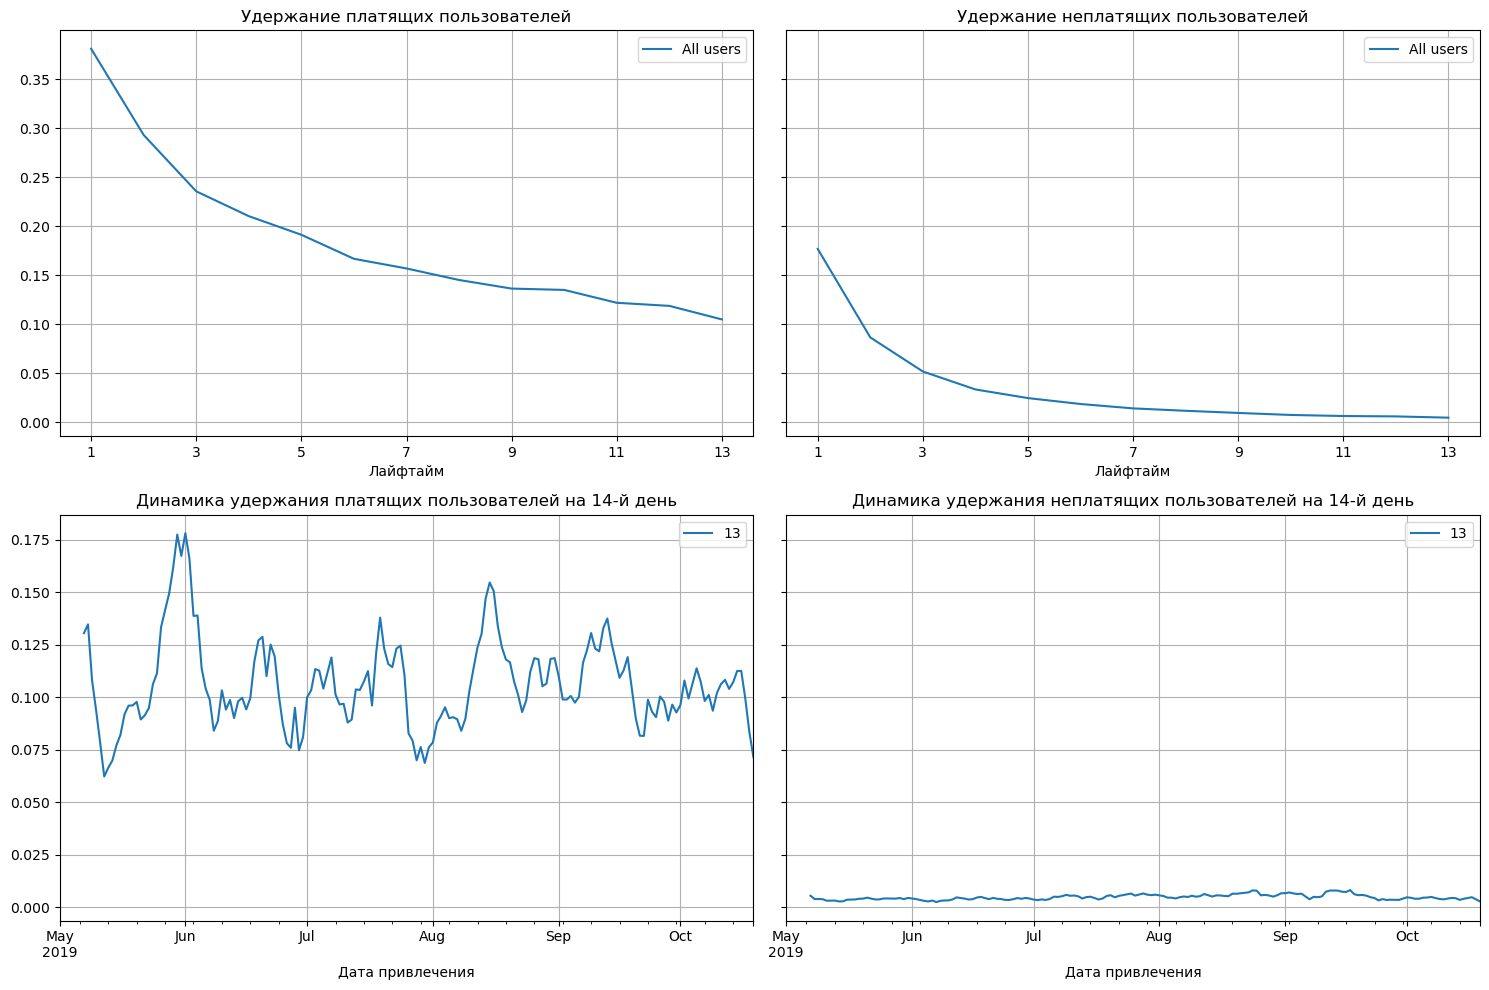

In [121]:
# исследуем удержание

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days
)

plot_retention(retention_grouped, retention_history, horizon_days) 

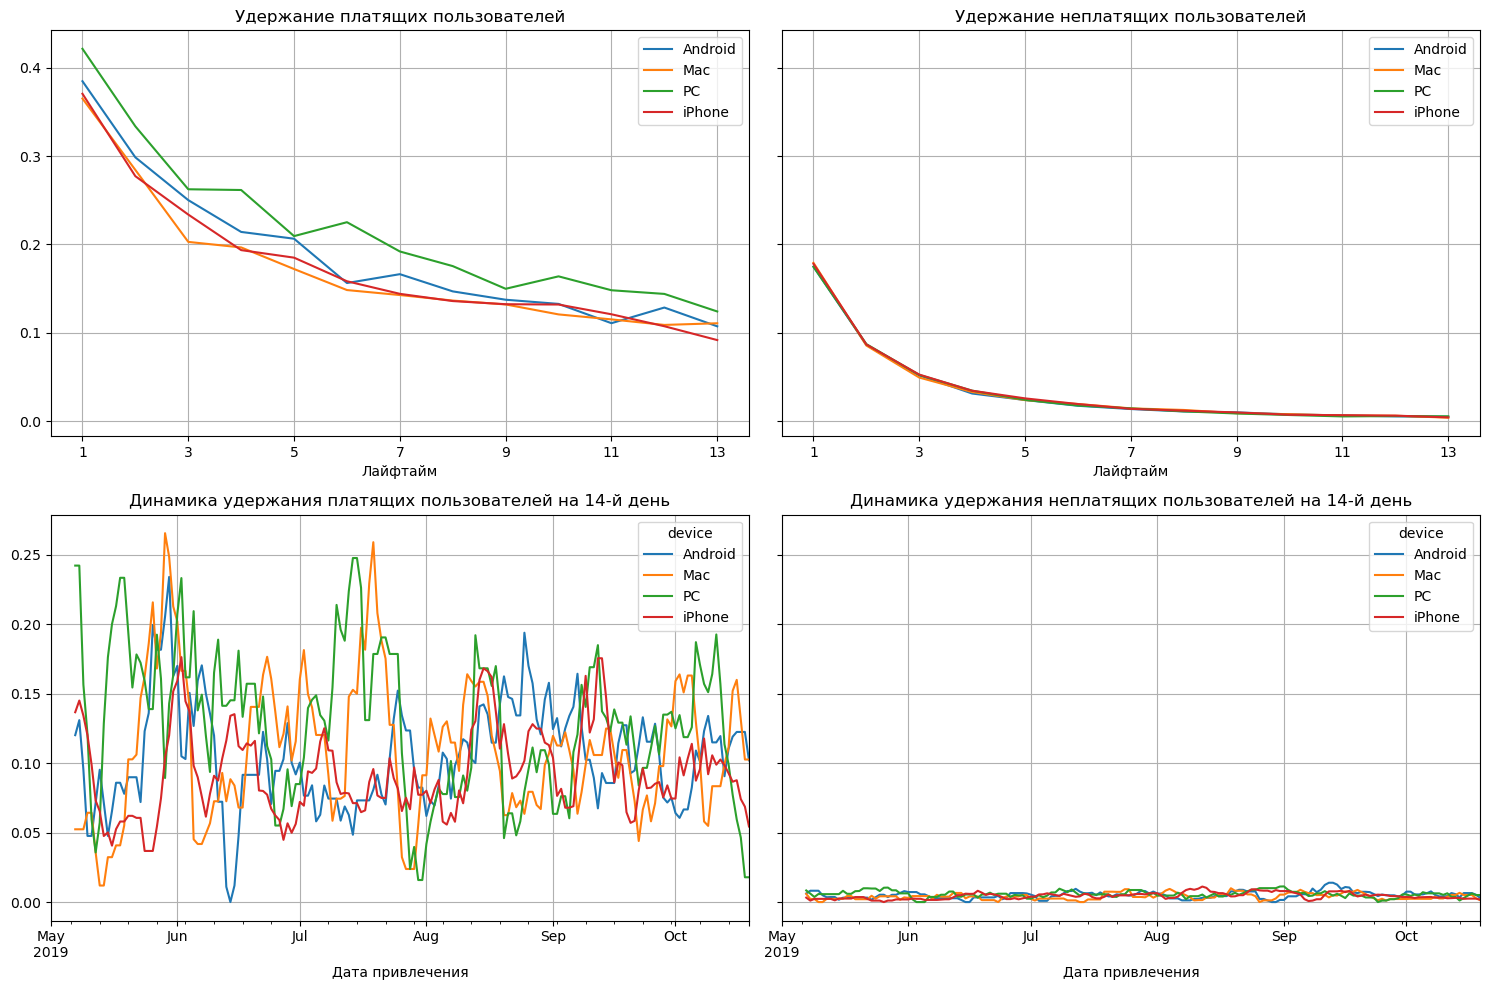

In [122]:
# исследуем удержание по устройствам

dimensions = ['device']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions = dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

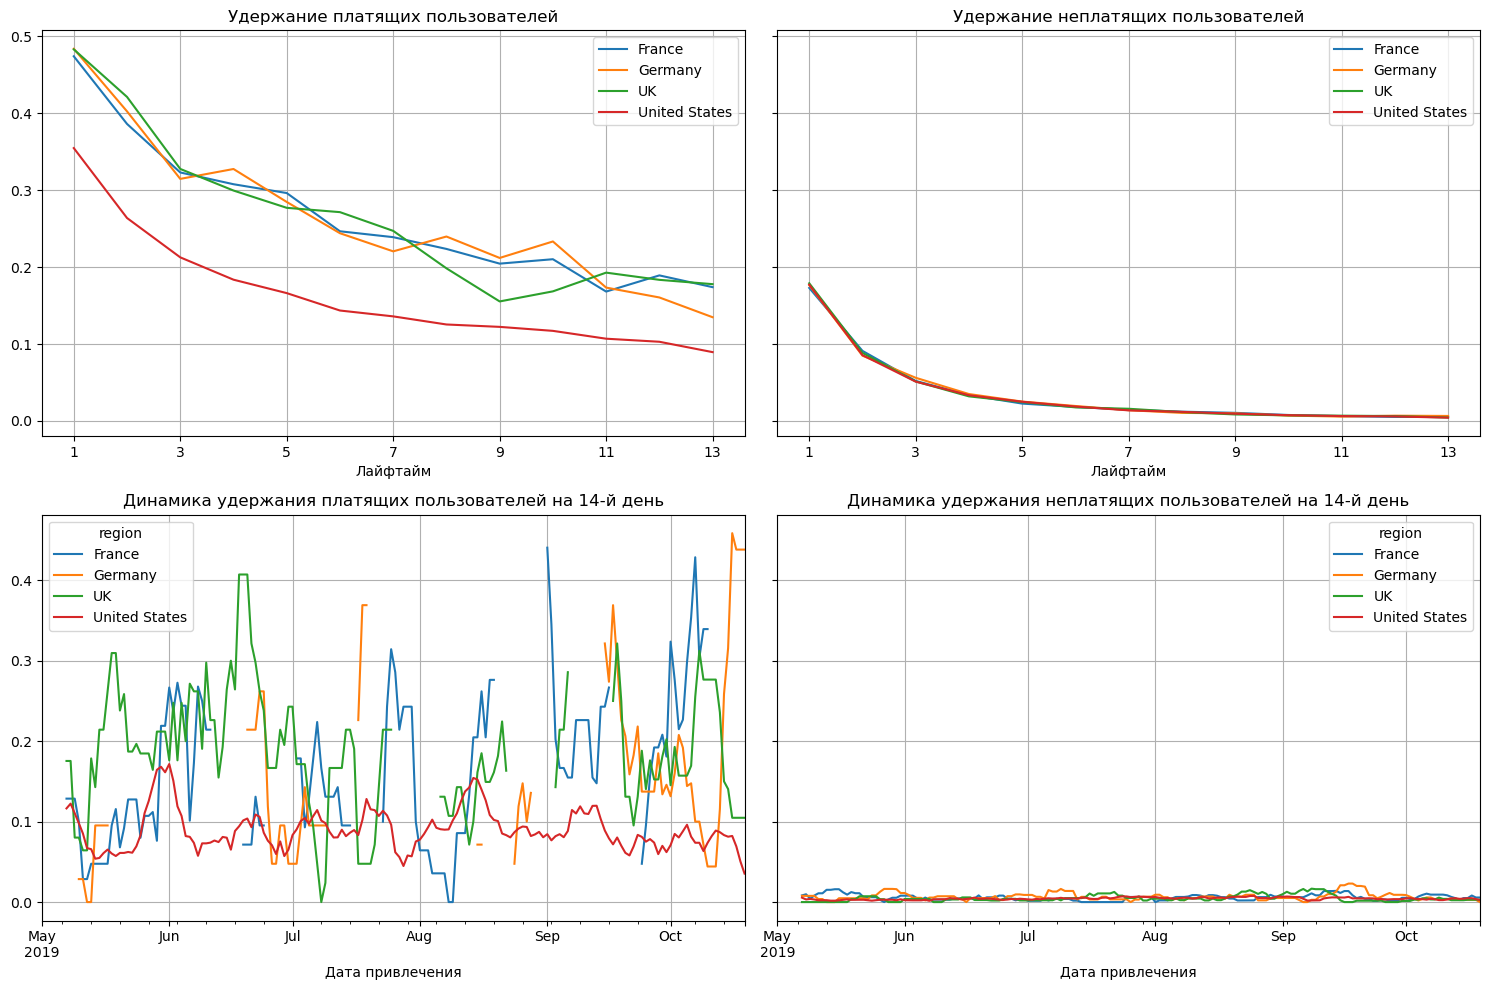

In [123]:
# исследуем удержание по рекламным каналам

dimensions = ['region']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions = dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

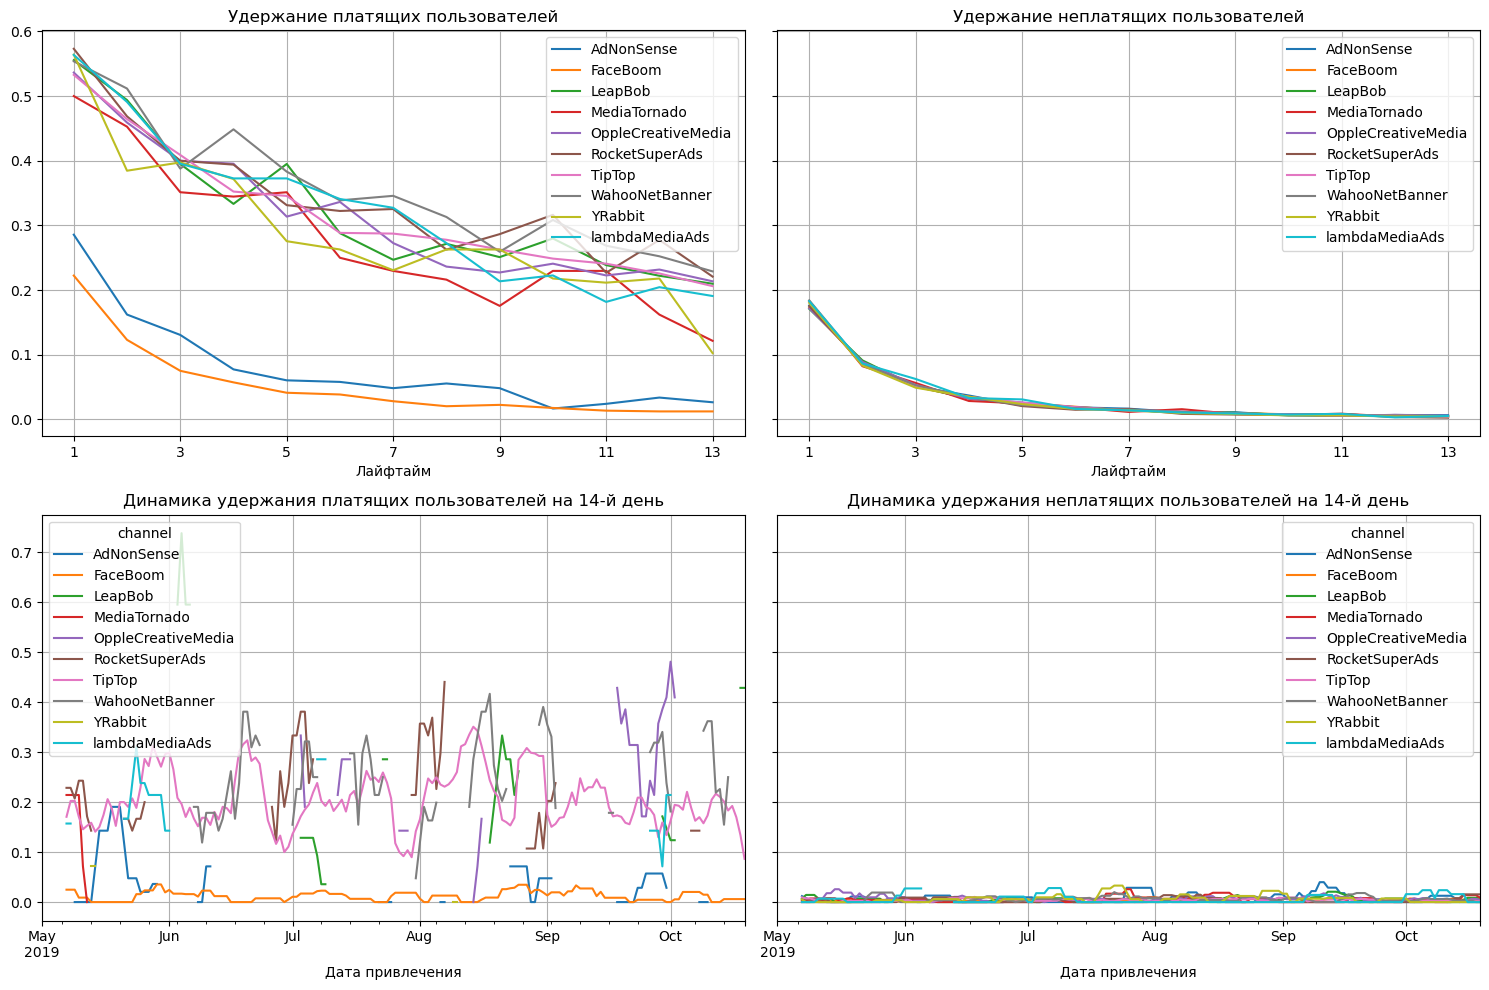

In [124]:
# исследуем удержание по рекламным каналам

dimensions = ['channel']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions = dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

**Вывод:**

1. Неплатящие пользователи плохо удерживаются. В принципе, это нормально, им нечего терять.
2. Платящие пользователи удерживаются заметно лучше.
3. Удержание в разрезе устройств показывают хороший результат **PC**, **Android**. Это неожтданный результат так как, на привлчение этих пользовталей тартиться меньше средств по сравнению с устройствами **Apple**.
4. По удержанию пользователей в разрезе регионов проишрывает США, не смотря на большие затраты на рекламу.
5. Аутсайдерами по удержанию в разрезе каналов привлечения пользователй являются **AdNonSense**, **FaceBoom**.  

#### Проанализируем окупаемость рекламы с разбивкой по устройствам пользователей.

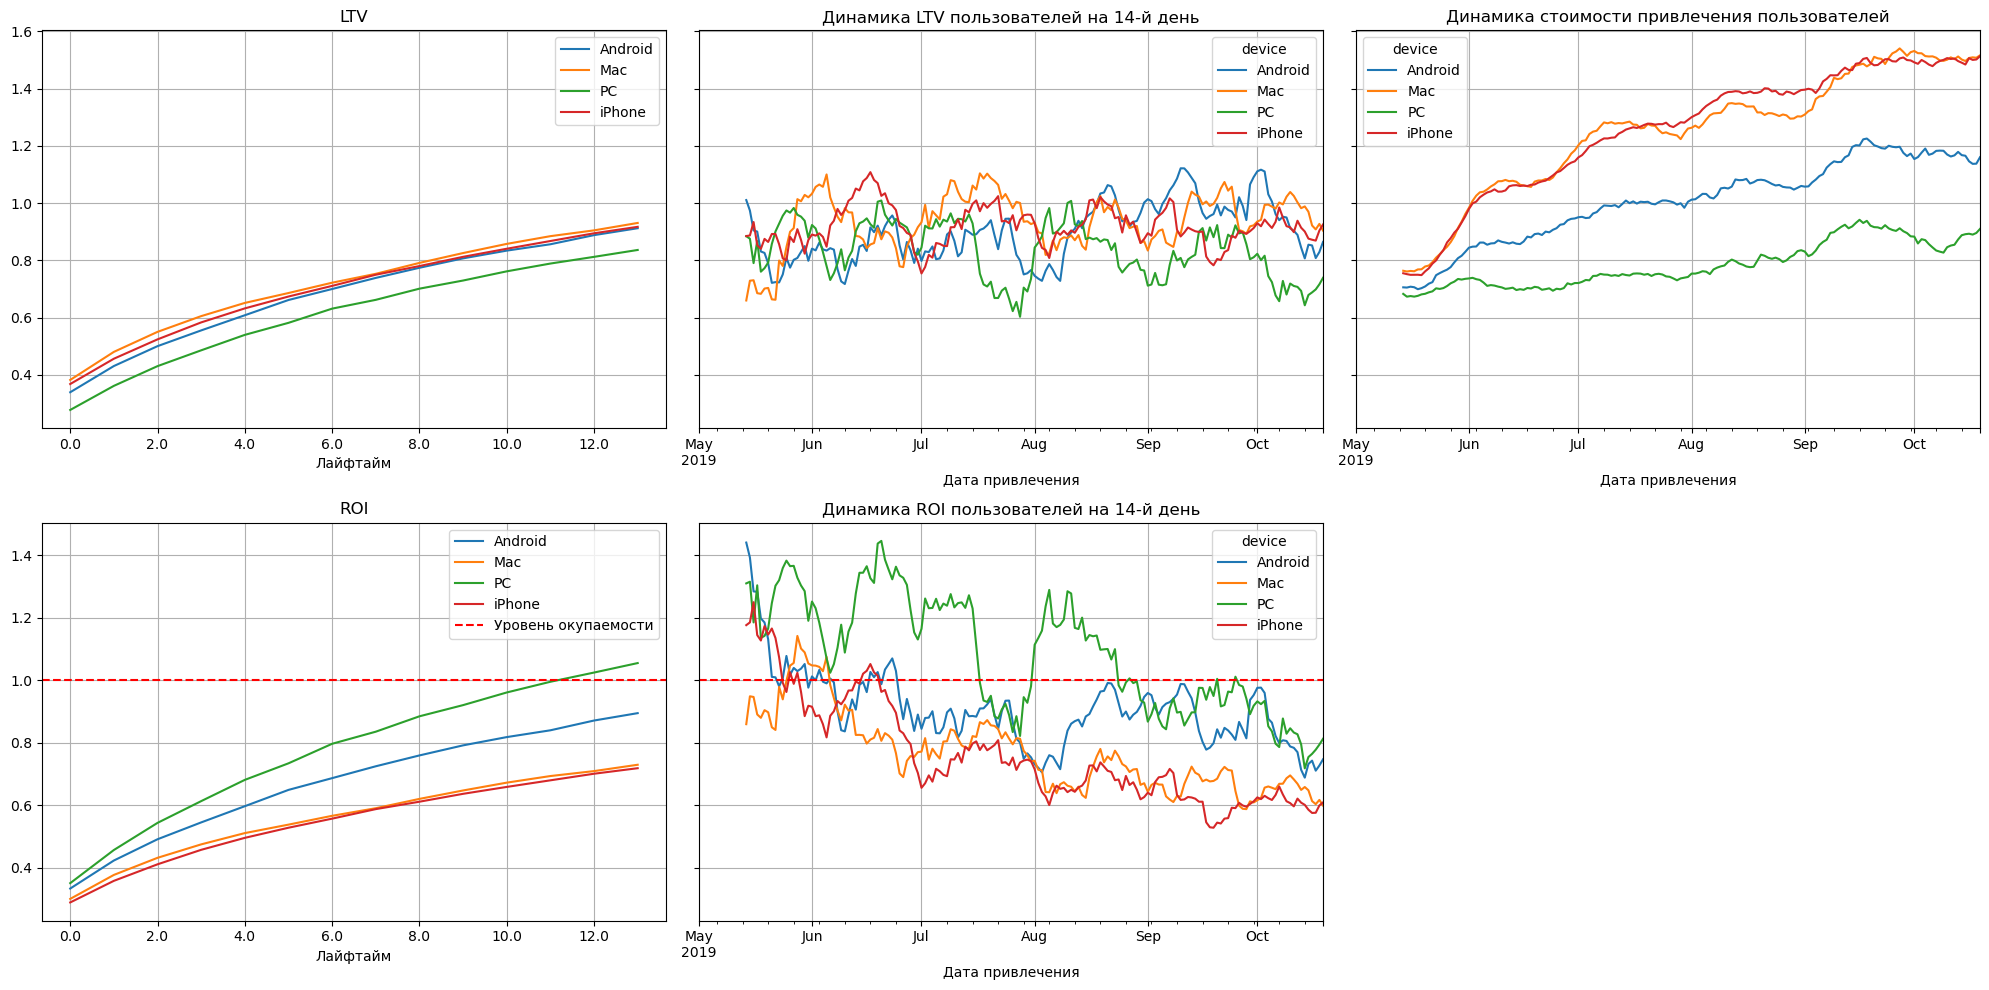

In [125]:
# смотрим окупаемость с разбивкой по устройствам

dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

**Вывод:**

1. В совокупности, лидерами по значению LTV, или Lifetime Value является устройтва компании **Apple**, из общий показателей значения выбиватся пользователи устройств **PC**. 
2. Динамика ROI пользователей на 14-й день показывает показывает снижение у всех категорий устройств. Пользователи **PC** окупают влооженные инвестицииб пользователи **iPhone** и **Mac** не окупаются за 2 недели. Скорее всего дело в стоимости привлечения этих устройств(она значительно выше, чем стоимость привлечения других устройств.

#### Определим окупаемость рекламы с разбивкой по странам.

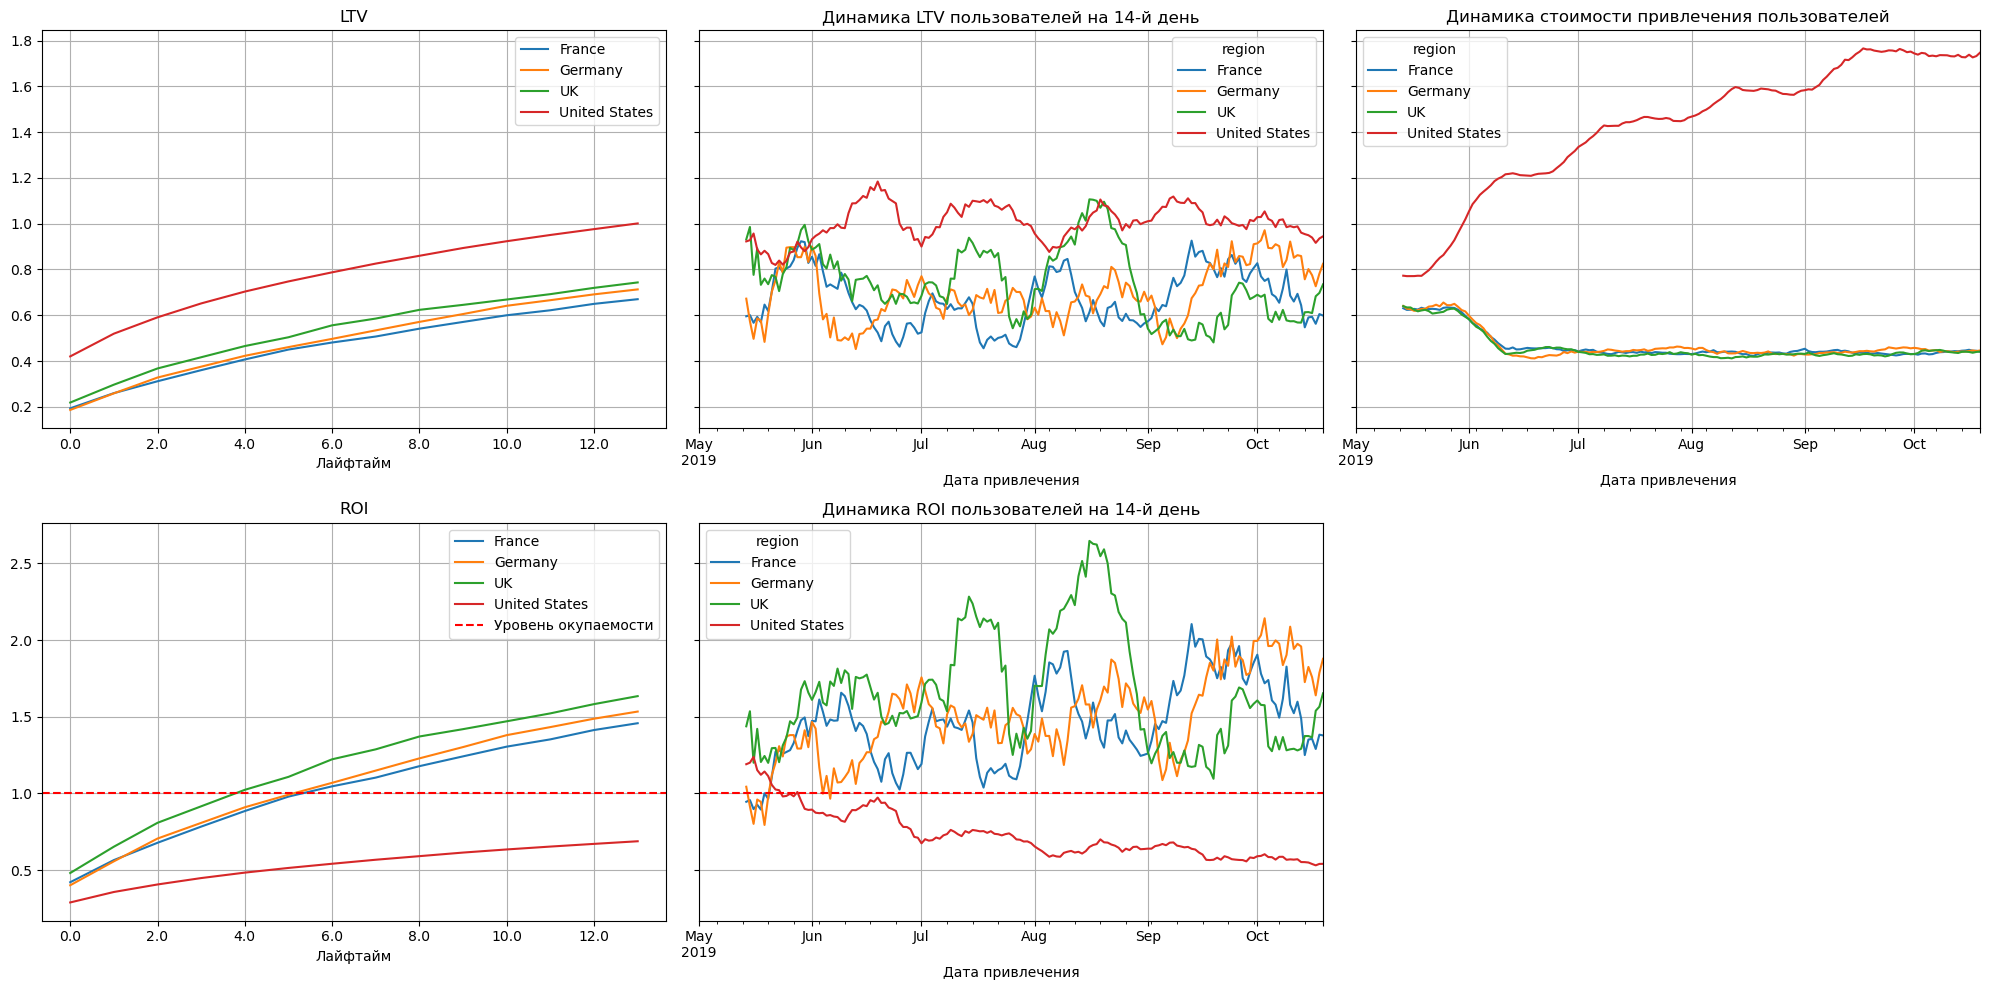

In [126]:
# смотрим окупаемость с разбивкой по странам

dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 


**Вывод**

1. LTV пользователей из **United States** превышает показатели остальных стран и достигают единицы.
2. Визуализация показывает, что привлечение пользователей из **United States**, которые составляют основную массу 100 тыс человек, обходятся очень дорого. Стоимость привлечения одного пользователя из **United States** в 4 раза дороже(в октябре), чем привлечение пользователя из других стран.
3. Пользователи из **United States** не окупаются за 2 недели, к концу 14 дня их окупаемость всего около 60%
4. График динамики ROI пользователей показывает всплески окупаемости инвестиций в Июле и Августе пользователей **UK**. Показатели ROI пользователей **UK** в Августе являются рекордными за период наблюдения. 

#### Проанализируем окупаемость рекламы с разбивкой по каналам.

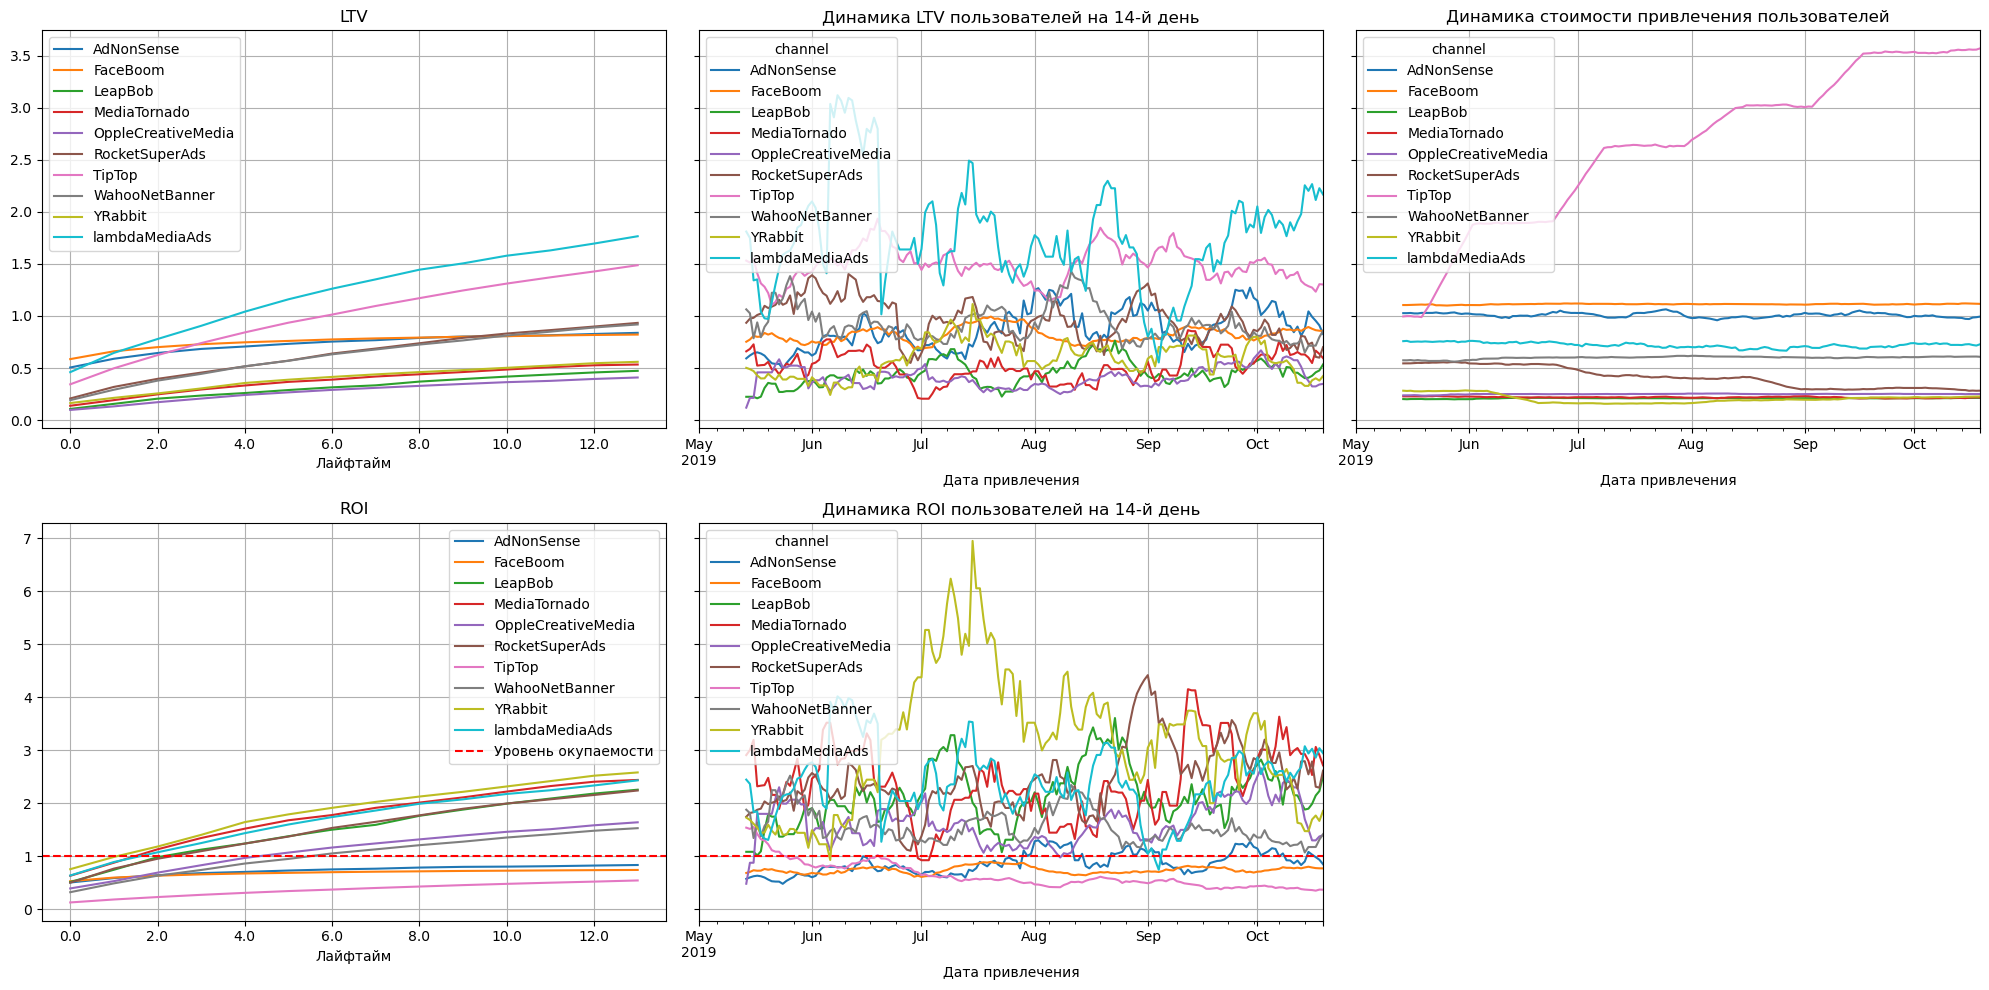

In [127]:
# смотрим окупаемость с разбивкой по источникам привлечения

dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

**Вывод**

1. Расчетные значения показывают, что LTV рекламных источников **lambdaMediaAd**, **TipTop** растут и превышают значения остальных источников, но с учетом роста стоимости привлечения пользователей  **TipTop** выявленный рост не соответствует вложенным средствам.
2. Расчеты динамики стоимости привлечения пользователей показывают взрывной рост затрат на канал **TipTop**. Остальные источники показывают относительно "ровный" уровень расходов. 
3. Пользователи пришедшие из каналов **TipTop**, **FaceBoom** и **AdNonSence** не окупаются за 14 дней.
4. Динамика ROI польозвателей на 14-й день **YRabbit** показывает всплеск в середине лета, что может говорить о наличии сезонного изменения показателей.	

**Заключение:**

1. В целом реклама на привлечение пользователей не окупается.
2. Негативное влияние на окупаемость рекламы оказывают:

  - пользователи из **United States** (основная масса пользователей), они обходятся в несколько раз дороже, чем пользователи из 
    других стран. Как итог, они не окупаются;
  - пользователи, которые пользуются **iPhone** (основная масса пользователей) и **Mac** обходятся дороже, чем пользователи 
    других устройств;
  - пользователи, пришедшие из каналов **TipTop**, **FaceBoom** и **AdNonSence** не окупаются, так как их привлечение дороже 
    остальных.
3. Проблемы окупаемости вызваны тем, что затраты на привлечение пользователей основных масс, обходятся слишком дорого.

### Вывод на основе результатов исследования проблемы

####  Выделим причины неэффективности привлечения пользователей.

Компания-разработчик развлекательного приложения Procrastinate Pro+ осуществляет свою деятельность на территории США, Европы (Франция, Германия), Великобритании. Несмотря на существенный рекламный бюджет, на маркетинг было вделено около 106 тыс. у.е., компания несет убытки.

Для анализа ситуации были предоставленны компанией-заказчиком информация о польхователях, привлеченных с с 1 мая по 27 октября 
2019 года в виде:
- лог сервера с данными об их посещениях;
- выгрузку покупок за этот период;
- рекламные расходы. 

В результате проведенного исследования было выявлено, что финансовые проблемы являются результатом увеличения рекламных трат на привлечение пользователей посредством следующих каналов **TipTop**, **FaceBoom**,  в США и **AdNonSence** в Европе (топ3 САС). Расчеты показывают что:
- из высокой стоимости привлечения у этих каналов, не проиходит окупаемость в горизонте исследования (14 дней); 
- так же, платящие пользователи **FaceBoom** и **AdNonSence** имеют очень плохое удержание;
- пользователи устройств компании **Apple** оказались самыми неплатящими, возможно есть проблема с оптимизацией приложения Procrastinate Pro+ для устройств под управлением операционной системой ios.
- канал по привлечению пользователей **TipTop** оказался самым неэффективный, несмотря на рост расходов на него в  за исседуемый период почти в три раза;
- произошло непрогнозируемое событие в США, которое значительно снизило не только уровень ROI пользователей, но и кардинально повысило стоимость привлечения польжователей из указанной страны. 



#### Рекомендации для отдела маркетинга по изменению рекламной компании.

1. Нужно искать новые каналы для привлечения пользователей из стран: **UK** и **Germany**.
2. Привлекать больше **PC** и **Android** пользователей по причине более сдержанного роста стоимости привления пользователей и лучший окупаемости инвестиций.
3. Стоит обратить внимание на 3 недооценённых канала с наивысшим ROI: **Yrabbit**, **MediaTornado**, **lambdaMediaAds**. Данные расчетов показывают окупаемость инвестиций в указанные кананы на уровне 2.5, хорошие показатели LTV  стабильных расходов денежных средств.
4. Канал привлечения пользователей **RocketSuperAds** показывает уровень LTV аналогичный лидерам этого показателя **TipTop** и **AdNonSence**.При этом находится в пятерке лучших по показателям ROI около 2,5 единицы. Кроме этого показывает стабтльное снижение стоимости привлечения пользоватлей за исследуемый период. Подводя итог сказаннуму канал **RocketSuperAds** является хорошим и полностью не раскрытым истоником привления новых пользователей.
5. Платящие PC пользователи удерживаются очень хорошо, но конверсия самая низкая. Потенциал есть, нужно обратить внимание на саму рекламу.
6. Самый высокий LTV у канала **lambdaMediaAds**. Платящим пользователям явно нравится продукт, можно попробовать найти подешевле канал привлечения для этих пользователей, чтобы увеличить ROI.
